# 1. Importando dos Dados

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', 200)

In [2]:
dados = pd.read_csv("dados_SP.csv", sep=',', low_memory=False)
dados

,Unnamed: 0,data,mês,cod7d,cidade,uf,munuf,casos_diários,casos_acumulados,casos_acumulados_ontem,mortes_diárias,mortes_acumuladas,mortes_acumuladas_ontem,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,amazonia,fronteira,capital,litoral,semiarido,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,0,2020-02-26,2,3550308,São Paulo,SP,São Paulo-SP,1,1,0,0,0,0,12252023,0.0,0.0,-23.548,-46.636,N,N,S,N,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,NaN
1,1,2020-02-27,2,3550308,São Paulo,SP,São Paulo-SP,0,1,1,0,0,0,12252023,0.0,0.0,-23.548,-46.636,N,N,S,N,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,NaN
2,2,2020-02-28,2,3550308,São Paulo,SP,São Paulo-SP,0,1,1,0,0,0,12252023,0.0,0.0,-23.548,-46.636,N,N,S,N,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,NaN
3,3,2020-02-29,2,3550308,São Paulo,SP,São Paulo-SP,0,1,1,0,0,0,12252023,0.0,0.0,-23.548,-46.636,N,N,S,N,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,NaN
4,4,2020-03-01,3,3550308,São Paulo,SP,São Paulo-SP,0,1,1,0,0,0,12252023,0.0,0.0,-23.548,-46.636,N,N,S,N,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8790,2020-05-07,5,3522208,Itapecerica da Serra,SP,Itapecerica da Serra-SP,17,167,150,0,12,12,175693,95.1,68.3,-23.717,-46.849,N,N,N,N,N,Metropolitana,0.742,Maior de 100 mil,15,Metropolitana de São Paulo,60,Itapecerica da Serra,0,60,0,0,347,0,407,72,42,39,19,0,10,182,0.55
8791,8791,2020-05-07,5,3509700,Campos do Jordão,SP,Campos do Jordão-SP,0,4,4,0,0,0,52088,7.7,0.0,-22.739,-45.591,N,N,N,N,N,Interior,0.749,Maior de 50 mil,13,Vale do Paraíba Paulista,49,Campos do Jordão,0,10,0,0,0,0,10,14,18,14,9,136,0,191,NaN
8792,8792,2020-05-07,5,3506607,Biritiba Mirim,SP,Biritiba Mirim-SP,2,12,10,0,0,0,32598,36.8,0.0,-23.573,-46.039,N,N,N,N,N,Metropolitana,0.712,Maior de 10 mil,15,Metropolitana de São Paulo,62,Mogi das Cruzes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
8793,8793,2020-05-07,5,3513504,Cubatão,SP,Cubatão-SP,7,52,45,4,4,0,130705,39.8,30.6,-23.895,-46.425,N,N,N,N,N,Metropolitana,0.737,Maior de 100 mil,15,Metropolitana de São Paulo,63,Santos,3,9,2,2,0,0,16,11,31,18,6,0,0,66,0.49


In [3]:
dados = dados.drop(['Unnamed: 0', 'casos_acumulados_ontem', 'mortes_acumuladas_ontem'], axis=1)

## 1.1. Verificando qualidade dos dados

### 1.1.1. Análise das Variáveis

1. data: data da observação
2. mês: mês da observação
3. cod7d: código de 7 dígitos do município de acordo com o IBGE
4. cidade: nome do mmunicípio
5. uf: sigla do estado
6. munuf: município-UF
7. casos_diários: número de casos de COVID-19 confirmados  na data
8. casos_acumulados: número de casos de COVID-19 confirmados acumulados até a data
9. mortes_diárias: número de mortes causadas por COVID-19 confirmadas  na data
10. mortes_acumuladas: número de mortes causadas por COVID-19 confirmadas acumuladas até a data
11. habitantes: população estimada do município em 2019 de acordo com o IBGE
12. casos_por_100mil_hab: indicador de casos confirmados acumulados até a data por 100 mil habitantes
13. mortes_por_milhão_hab: : indicador de mortes confirmadas acumuladas até a data por milhão de habitantes
14. lat: latitude do município
15. lon: longitude do município
16. amazonia: indica se o município faz parte da Amazônia legal
17. fronteira: indica se o município faz fronteira com outros países
18. capital: indica se o município é capital de estado
19. litoral: indica se o município faz parte do litoral
20. semiarido: indica se o município faz parte do semiárido
21. papel: indica se o município é capital, do interior ou da região metropolitana
22. idhm_2010: índice de desenvolvimento humano municipal de acordo com o último censo
23. faixa_pop: indica em qual faixa de população o município está: maior de 100 mil, maior de 50 mil, maior de 10 mil ou menor de 10 mil
24. Mesorregião Geográfica: código da messorregião geográfica em que o município se encontra de acordo com o IBGE
25. Nome_Mesorregião: nome da messorregião geográfica em que o município se encontra de acordo com o IBGE
26. Microrregião Geográfica: código da microrregião geográfica em que o município se encontra de acordo com o IBGE
27. Nome_Microrregião: nome da microrregião geográfica em que o município se encontra de acordo com o IBGE
28. Cirúrgicos_Não_SUS: quantidade de leitos de UTI cirúrgicos privados do município
29. Clínicos_Não_SUS: quantidade de leitos de UTI clínicos privados do município
30. Obstétrico_Não_SUS: quantidade de leitos de UTI obstétricos privados do município
31. Pediátrico_Não_SUS: quantidade de leitos de UTI pediátricos privados do município
32. Outras_Especialidades_Não_SUS: quantidade de leitos de UTI de outras especialidades não citadas privados do município
33. Hospital/DIA_Não_SUS: quantidade de leitos de UTI de assistência intermediária entre a internação e o atendimento ambulatorial, que requeiram a permanência do paciente na Unidade por um período máximo de 12 horas privados do município
34. Total_Não_SUS: quantidade total de leitos de UTI privados do município
35. Cirúrgicos_SUS: quantidade de leitos de UTI cirúrgicos do SUS do município
36. Clínicos_SUS: quantidade de leitos de UTI clínicos do SUS do município
37. Obstétrico_SUS: quantidade de leitos de UTI obstétricos do SUS do município
38. Pediátrico_SUS: quantidade de leitos de UTI pediátricos do SUS do município
39. Outras_Especialidades_SUS: quantidade de leitos de UTI de outras especialidades não citadas do SUS do município
40. Hospital/DIA_SUS: quantidade de leitos de UTI de assistência intermediária entre a internação e o atendimento ambulatorial, que requeiram a permanência do paciente na Unidade por um período máximo de 12 horas do SUS do município
41. Total_SUS: quantidade total de leitos de UTI do SUS do município
42. índice_isolamento: resultado da divisão entre o número de pessoas que não saíram de sua área de moradia e a população do município, proveniente da Secretaria de Saúde do Estado de São Paulo.

### 1.1.2. Tipos das Variáveis

In [4]:
dados.dtypes

data                              object
mês                                int64
cod7d                              int64
cidade                            object
uf                                object
munuf                             object
casos_diários                      int64
casos_acumulados                   int64
mortes_diárias                     int64
mortes_acumuladas                  int64
habitantes                         int64
casos_por_100mil_hab             float64
mortes_por_milhão_hab            float64
lat                              float64
lon                              float64
amazonia                          object
fronteira                         object
capital                           object
litoral                           object
semiarido                         object
papel                             object
idhm_2010                        float64
faixa_pop                         object
Mesorregião Geográfica             int64
Nome_Mesorregião

In [5]:
dados['data'] = pd.to_datetime(dados['data'], errors='coerce', infer_datetime_format=True)
dados.dtypes

data                             datetime64[ns]
mês                                       int64
cod7d                                     int64
cidade                                   object
uf                                       object
munuf                                    object
casos_diários                             int64
casos_acumulados                          int64
mortes_diárias                            int64
mortes_acumuladas                         int64
habitantes                                int64
casos_por_100mil_hab                    float64
mortes_por_milhão_hab                   float64
lat                                     float64
lon                                     float64
amazonia                                 object
fronteira                                object
capital                                  object
litoral                                  object
semiarido                                object
papel                                   

### 1.1.3. Tamanho do dataset

In [6]:
dados.shape

(8795, 42)

### 1.1.4. Valores únicos em cada variável

In [7]:
dados.nunique()

data                              72
mês                                4
cod7d                            383
cidade                           383
uf                                 1
munuf                            383
casos_diários                    124
casos_acumulados                 406
mortes_diárias                    49
mortes_acumuladas                110
habitantes                       382
casos_por_100mil_hab             795
mortes_por_milhão_hab            497
lat                              363
lon                              371
amazonia                           1
fronteira                          1
capital                            2
litoral                            2
semiarido                          1
papel                              3
idhm_2010                        129
faixa_pop                          4
Mesorregião Geográfica            15
Nome_Mesorregião                  15
Microrregião Geográfica           63
Nome_Microrregião                 63
C

In [8]:
dados['mês'].unique()

array([2, 3, 4, 5], dtype=int64)

In [9]:
dados['uf'].unique()

array(['SP'], dtype=object)

In [10]:
dados['amazonia'].unique()

array(['N'], dtype=object)

In [11]:
dados['fronteira'].unique()

array(['N'], dtype=object)

In [12]:
dados['capital'].unique()

array(['S', 'N'], dtype=object)

In [13]:
dados['litoral'].unique()

array(['N', 'S'], dtype=object)

In [14]:
dados['semiarido'].unique()

array(['N'], dtype=object)

In [15]:
dados['papel'].unique()

array(['Capital', 'Metropolitana', 'Interior'], dtype=object)

In [16]:
dados['faixa_pop'].unique()

array(['Maior de 100 mil', 'Maior de 50 mil', 'Maior de 10 mil',
       'Menor de 10 mil'], dtype=object)

Com o escopo reduzido apenas ao estado de SP, não faz mais sentido levar todas as colunas para o modelo, pois algumas possuem o mesmo valor para todas as observações. Serão excluídas as colunas:
* UF (SP)
* amazonia (Não)
* fronteira (Não)
* semiarido (Não)

In [17]:
dados = dados.drop(['uf', 'amazonia', 'fronteira', 'semiarido'], axis=1)
dados.columns

Index(['data', 'mês', 'cod7d', 'cidade', 'munuf', 'casos_diários',
       'casos_acumulados', 'mortes_diárias', 'mortes_acumuladas', 'habitantes',
       'casos_por_100mil_hab', 'mortes_por_milhão_hab', 'lat', 'lon',
       'capital', 'litoral', 'papel', 'idhm_2010', 'faixa_pop',
       'Mesorregião Geográfica', 'Nome_Mesorregião', 'Microrregião Geográfica',
       'Nome_Microrregião', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS',
       'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
       'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
       'Total_SUS', 'índice_isolamento'],
      dtype='object')

### 1.1.5. Valores faltantes

In [18]:
dados.isnull().sum()

data                                0
mês                                 0
cod7d                               0
cidade                              0
munuf                               0
casos_diários                       0
casos_acumulados                    0
mortes_diárias                      0
mortes_acumuladas                   0
habitantes                          0
casos_por_100mil_hab                0
mortes_por_milhão_hab               0
lat                                 0
lon                                 0
capital                             0
litoral                             0
papel                               0
idhm_2010                           0
faixa_pop                           0
Mesorregião Geográfica              0
Nome_Mesorregião                    0
Microrregião Geográfica             0
Nome_Microrregião                   0
Cirúrgicos_Não_SUS                  0
Clínicos_Não_SUS                    0
Obstétrico_Não_SUS                  0
Pediátrico_N

Como pouco mais da metade das cidades paulistas não possuem índice de isolamento, vamos considerar o valor da mediana do índice de isolamento no lugar dos valores faltantes.

In [19]:
dados['índice_isolamento'].median()

0.53

In [20]:
dados['índice_isolamento'].fillna(value=0.53, inplace=True)

In [21]:
dados.isnull().sum()

data                             0
mês                              0
cod7d                            0
cidade                           0
munuf                            0
casos_diários                    0
casos_acumulados                 0
mortes_diárias                   0
mortes_acumuladas                0
habitantes                       0
casos_por_100mil_hab             0
mortes_por_milhão_hab            0
lat                              0
lon                              0
capital                          0
litoral                          0
papel                            0
idhm_2010                        0
faixa_pop                        0
Mesorregião Geográfica           0
Nome_Mesorregião                 0
Microrregião Geográfica          0
Nome_Microrregião                0
Cirúrgicos_Não_SUS               0
Clínicos_Não_SUS                 0
Obstétrico_Não_SUS               0
Pediátrico_Não_SUS               0
Outras_Especialidades_Não_SUS    0
Hospital/DIA_Não_SUS

### 1.1.6. Criação da Variável 'dias_epidemiológicos'

Dia epidemiológico é a quantidade de dias passados desde o primeiro caso, representando há quantos dias a cidade está na epidemia. Essa variável poderá ser utilizada na modelagem para cálculos de previsão de casos e mortes. Exemplo: no dia do ano 123, uma cidade pode estar no dia 5 da epidemia e outra cidade pode estar no dia 120 da epidemia: portanto, não se pode multiplicar o mesmo dia do ano por uma constante e esperar que dê resultados diferentes para as duas cidades. Mas se multiplicar o dia epidemiológico de cada uma pela constante, teremos um número de casos diferente e proporcional à fase em que cada cidade se encontra.

In [22]:
dados.columns

Index(['data', 'mês', 'cod7d', 'cidade', 'munuf', 'casos_diários',
       'casos_acumulados', 'mortes_diárias', 'mortes_acumuladas', 'habitantes',
       'casos_por_100mil_hab', 'mortes_por_milhão_hab', 'lat', 'lon',
       'capital', 'litoral', 'papel', 'idhm_2010', 'faixa_pop',
       'Mesorregião Geográfica', 'Nome_Mesorregião', 'Microrregião Geográfica',
       'Nome_Microrregião', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS',
       'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
       'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
       'Total_SUS', 'índice_isolamento'],
      dtype='object')

In [23]:
dados['dia_do_ano'] = [n.dayofyear for n in dados['data']]

colunas = ['data', 'dia_do_ano', 'mês', 'cod7d', 'cidade', 'munuf', 'casos_diários',
           'casos_acumulados', 'mortes_diárias', 'mortes_acumuladas', 'habitantes',
           'casos_por_100mil_hab', 'mortes_por_milhão_hab', 'lat', 'lon',
           'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
           'idhm_2010', 'faixa_pop', 'Mesorregião Geográfica', 'Nome_Mesorregião',
           'Microrregião Geográfica', 'Nome_Microrregião', 'Cirúrgicos_Não_SUS',
           'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
           'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
           'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
           'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
           'Total_SUS', 'índice_isolamento']
dados = dados.reindex(columns=colunas)
dados.head()

,data,dia_do_ano,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,2020-02-26,57,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
1,2020-02-27,58,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
2,2020-02-28,59,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
3,2020-02-29,60,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
4,2020-03-01,61,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53


In [24]:
aux = dados[['munuf', 'dia_do_ano', 'data', 'casos_acumulados', 'mortes_acumuladas']].copy()
aux.drop_duplicates(subset='munuf', keep='first', inplace=True)
aux

,munuf,dia_do_ano,data,casos_acumulados,mortes_acumuladas
0,São Paulo-SP,57,2020-02-26,1,0
12,Santana de Parnaíba-SP,68,2020-03-08,1,0
21,Ferraz de Vasconcelos-SP,72,2020-03-12,1,0
26,Carapicuíba-SP,74,2020-03-14,1,0
33,São Bernardo do Campo-SP,75,2020-03-15,1,0
...,...,...,...,...,...
8696,Canas-SP,128,2020-05-07,1,0
8708,São Luiz do Paraitinga-SP,128,2020-05-07,1,1
8727,Ipuã-SP,128,2020-05-07,5,0
8750,Santa Cruz da Esperança-SP,128,2020-05-07,2,0


In [25]:
aux.drop(columns=['data', 'casos_acumulados', 'mortes_acumuladas'], inplace=True)
aux.rename(columns={'dia_do_ano': 'dia_do_registro1'}, inplace=True)
aux

,munuf,dia_do_registro1
0,São Paulo-SP,57
12,Santana de Parnaíba-SP,68
21,Ferraz de Vasconcelos-SP,72
26,Carapicuíba-SP,74
33,São Bernardo do Campo-SP,75
...,...,...
8696,Canas-SP,128
8708,São Luiz do Paraitinga-SP,128
8727,Ipuã-SP,128
8750,Santa Cruz da Esperança-SP,128


In [26]:
dados = pd.merge(dados, aux, how='left', on=['munuf'])
dados

,data,dia_do_ano,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento,dia_do_registro1
0,2020-02-26,57,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53,57
1,2020-02-27,58,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53,57
2,2020-02-28,59,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53,57
3,2020-02-29,60,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53,57
4,2020-03-01,61,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,2020-05-07,128,5,3522208,Itapecerica da Serra,Itapecerica da Serra-SP,17,167,0,12,175693,95.1,68.3,-23.717,-46.849,NaN,NaN,N,N,Metropolitana,0.742,Maior de 100 mil,15,Metropolitana de São Paulo,60,Itapecerica da Serra,0,60,0,0,347,0,407,72,42,39,19,0,10,182,0.55,91
8791,2020-05-07,128,5,3509700,Campos do Jordão,Campos do Jordão-SP,0,4,0,0,52088,7.7,0.0,-22.739,-45.591,NaN,NaN,N,N,Interior,0.749,Maior de 50 mil,13,Vale do Paraíba Paulista,49,Campos do Jordão,0,10,0,0,0,0,10,14,18,14,9,136,0,191,0.53,104
8792,2020-05-07,128,5,3506607,Biritiba Mirim,Biritiba Mirim-SP,2,12,0,0,32598,36.8,0.0,-23.573,-46.039,NaN,NaN,N,N,Metropolitana,0.712,Maior de 10 mil,15,Metropolitana de São Paulo,62,Mogi das Cruzes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,114
8793,2020-05-07,128,5,3513504,Cubatão,Cubatão-SP,7,52,4,4,130705,39.8,30.6,-23.895,-46.425,NaN,NaN,N,N,Metropolitana,0.737,Maior de 100 mil,15,Metropolitana de São Paulo,63,Santos,3,9,2,2,0,0,16,11,31,18,6,0,0,66,0.49,103


In [27]:
dados.columns

Index(['data', 'dia_do_ano', 'mês', 'cod7d', 'cidade', 'munuf',
       'casos_diários', 'casos_acumulados', 'mortes_diárias',
       'mortes_acumuladas', 'habitantes', 'casos_por_100mil_hab',
       'mortes_por_milhão_hab', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
       'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
       'Total_SUS', 'índice_isolamento', 'dia_do_registro1'],
      dtype='object')

In [28]:
dados['dias_epidemiológicos'] = dados['dia_do_ano'] + 1 - dados['dia_do_registro1']
dados.drop(columns=['dia_do_ano', 'dia_do_registro1'])
colunas = ['data', 'dias_epidemiológicos', 'mês', 'cod7d', 'cidade', 'munuf',
       'casos_diários', 'casos_acumulados', 'mortes_diárias',
       'mortes_acumuladas', 'habitantes', 'casos_por_100mil_hab',
       'mortes_por_milhão_hab', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
       'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
       'Total_SUS', 'índice_isolamento'
       ]
dados = dados.reindex(columns=colunas)
dados.sort_values(by='data', ascending=True, inplace=True)
dados

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,NaN,NaN,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,2020-05-07,18,5,3542008,Quintana,Quintana-SP,0,2,0,0,6638,30.1,0.0,-22.073,-50.308,NaN,NaN,N,N,Interior,0.732,Menor de 10 mil,9,Marília,37,Tupã,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53
8535,2020-05-07,40,5,3550407,São Pedro,São Pedro-SP,9,36,0,0,35653,101.0,0.0,-22.549,-47.914,NaN,NaN,N,N,Interior,0.755,Maior de 10 mil,6,Piracicaba,28,Piracicaba,12,4,4,2,0,0,22,20,36,8,2,0,0,66,0.53
8534,2020-05-07,21,5,3503109,Arandu,Arandu-SP,0,10,0,2,6357,157.3,314.6,-23.134,-49.054,NaN,NaN,N,N,Interior,0.685,Menor de 10 mil,4,Bauru,22,Avaré,0,0,0,0,0,0,0,3,5,4,0,0,0,12,0.53
8543,2020-05-07,36,5,3500501,Águas de Lindóia,Águas de Lindóia-SP,0,4,0,1,18705,21.4,53.5,-22.476,-46.633,NaN,NaN,N,N,Interior,0.745,Maior de 10 mil,7,Campinas,33,Amparo,1,7,2,2,0,0,12,3,15,6,6,0,0,30,0.53


In [29]:
dados.nunique()

data                              72
dias_epidemiológicos              72
mês                                4
cod7d                            383
cidade                           383
munuf                            383
casos_diários                    124
casos_acumulados                 406
mortes_diárias                    49
mortes_acumuladas                110
habitantes                       382
casos_por_100mil_hab             795
mortes_por_milhão_hab            497
lat                              363
lon                              371
zona geográfica                    0
faixa meridional                   0
capital                            2
litoral                            2
papel                              3
idhm_2010                        129
faixa_pop                          4
Mesorregião Geográfica            15
Nome_Mesorregião                  15
Microrregião Geográfica           63
Nome_Microrregião                 63
Cirúrgicos_Não_SUS                76
C

In [30]:
dados['dias_epidemiológicos'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72], dtype=int64)

# 2. Análise Exploratória dos Dados

## 2.1. Classificação das Variáveis

### 2.1.1. Variáveis Categóricas

#### 2.1.1.1. Variáveis Qualitativas Nominais

 Representam uma classificação dos indivíduos, onde não existe ordenação dentre as categorias:

* 'cod7d'
* 'cidade'
* 'munuf'
* 'lat'
* 'lon'
* 'capital'
* 'litoral'
* 'papel'
* 'Mesorregião Geográfica'
* 'Nome_Mesorregião'
* 'Microrregião Geográfica'
* 'Nome_Microrregião'

#### 2.1.1.2. Variáveis Qualitativas Ordinais

 Representam uma classificação dos indivíduos, onde existe ordenação dentre as categorias:

* 'data'
* 'dias_epidemiológicos'
* 'mês'
* 'faixa_pop'

### 2.1.2. Variáveis Numéricas

#### 2.1.2.1. Variáveis Quantitativas Discretas

Características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores e, assim, somente fazem sentido valores inteiros:

* 'casos_diários'
* 'casos_acumulados'
* 'mortes_diárias'
* 'mortes_acumuladas'
* 'habitantes'
* 'Cirúrgicos_Não_SUS'
* 'Clínicos_Não_SUS'
* 'Obstétrico_Não_SUS'
* 'Pediátrico_Não_SUS'
* 'Outras_Especialidades_Não_SUS'
* 'Hospital/DIA_Não_SUS'
* 'Total_Não_SUS'
* 'Cirúrgicos_SUS'
* 'Clínicos_SUS'
* 'Obstétrico_SUS'
* 'Pediátrico_SUS'
* 'Outras_Especialidades_SUS'
* 'Hospital/DIA_SUS'
* 'Total_SUS'

#### 2.1.2.2. Variáveis Quantitativas Contínuas

Características mensuráveis que assumem valores em uma escala contínua (na reta real), para as quais valores fracionais fazem sentido:

* 'casos_por_100mil_hab'
* 'mortes_por_milhão_hab'
* 'idhm_2010'
* 'índice_isolamento'

## 2.2. Distribuição das variáveis qualitativas e tabelas de frequência

### 2.2.1. Análise univariada

#### 2.2.1.1. 'cod7d', 'cidade', 'munuf'

In [31]:
count = pd.DataFrame(dados['cod7d'].value_counts())

percent = pd.DataFrame(dados['cod7d'].value_counts(normalize=True)*100)

table = pd.concat([count, percent], axis=1)

table.columns = ['qtd.', '%']
table

,qtd.,%
3550308,72,0.818647
3547304,61,0.693576
3515707,57,0.648096
3510609,55,0.625355
3548708,54,0.613985
...,...,...
3546256,1,0.011370
3553500,1,0.011370
3531407,1,0.011370
3509957,1,0.011370


In [32]:
cidade = dados[['cod7d', 'munuf']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)
cidade

,cod7d,munuf
0,3550308,São Paulo-SP
12,3547304,Santana de Parnaíba-SP
21,3515707,Ferraz de Vasconcelos-SP
26,3510609,Carapicuíba-SP
33,3548708,São Bernardo do Campo-SP
...,...,...
8750,3546256,Santa Cruz da Esperança-SP
8708,3550001,São Luiz do Paraitinga-SP
8727,3521309,Ipuã-SP
8430,3518503,Guareí-SP


In [33]:
table = table.merge(cidade, how='left', left_index=True, right_on='cod7d')
colunas = ['cod7d', 'munuf', 'qtd.', '%']
table = table.reindex(columns=colunas)
table.sort_values(by='qtd.', ascending=False, inplace=True)
table

,cod7d,munuf,qtd.,%
0,3550308,São Paulo-SP,72,0.818647
12,3547304,Santana de Parnaíba-SP,61,0.693576
21,3515707,Ferraz de Vasconcelos-SP,57,0.648096
26,3510609,Carapicuíba-SP,55,0.625355
33,3548708,São Bernardo do Campo-SP,54,0.613985
...,...,...,...,...
8623,3555703,União Paulista-SP,1,0.011370
8727,3521309,Ipuã-SP,1,0.011370
8430,3518503,Guareí-SP,1,0.011370
8635,3504909,Bananal-SP,1,0.011370


In [34]:
table.head(20)

,cod7d,munuf,qtd.,%
0,3550308,São Paulo-SP,72,0.818647
12,3547304,Santana de Parnaíba-SP,61,0.693576
21,3515707,Ferraz de Vasconcelos-SP,57,0.648096
26,3510609,Carapicuíba-SP,55,0.625355
33,3548708,São Bernardo do Campo-SP,54,0.613985
37,3547809,Santo André-SP,53,0.602615
35,3548807,São Caetano do Sul-SP,53,0.602615
49,3518800,Guarulhos-SP,52,0.591245
38,3529401,Mauá-SP,52,0.591245
56,3513009,Cotia-SP,51,0.579875


São Paulo-SP é a única cidade que aparece com observações nas 72 datas por ter sido a 1ª cidade brasileira a confirmar um caso de COVID-19 (homem de 61 anos que voltou de uma viagem na Itália).

In [35]:
table.tail(20)

,cod7d,munuf,qtd.,%
7844,3546306,Santa Cruz das Palmeiras-SP,2,0.02274
8103,3553609,Tapiratiba-SP,2,0.02274
8094,3551207,Sarutaiá-SP,2,0.02274
8189,3507753,Brejo Alegre-SP,2,0.02274
8205,3552700,Tabatinga-SP,2,0.02274
8091,3514106,Dois Córregos-SP,2,0.02274
8238,3519105,Iacanga-SP,2,0.02274
8366,3517505,Guapiaçu-SP,2,0.02274
8422,3540507,Porangaba-SP,1,0.01137
8696,3509957,Canas-SP,1,0.01137


A concentração de cidades com apenas 1 ou 2 observações acontece devido à transmissão sustentada: a doença não surge espontâneamente em um município, ela é levada ao município por uma pessoa infectada e a partir daí começa a se alastrar com o contágio das pessoas do município.

In [36]:
contagem_por_agrupamento_munuf = table.groupby(['qtd.']).count()
pd.DataFrame(contagem_por_agrupamento_munuf['cod7d'])

,cod7d
qtd.,
1,12
2,28
3,8
4,2
6,4
7,8
8,9
9,11
10,13


In [37]:
contagem_por_agrupamento_munuf[(contagem_por_agrupamento_munuf.index <= 20)].sum()

cod7d    158
munuf    158
%        158
dtype: int64

158 municípios paulistas têm até 20 observações.

In [38]:
pd.DataFrame(contagem_por_agrupamento_munuf['cod7d']).tail(20)

,cod7d
qtd.,
36,11
37,10
38,14
39,2
40,6
41,1
42,1
43,6
44,9


In [39]:
pd.DataFrame(contagem_por_agrupamento_munuf['cod7d']).tail(20).sum()

cod7d    82
dtype: int64

82 municípios paulistas têm 45 observações ou mais.

Text(0.0, 1.0, 'Quantidade de Observações por Municípios do Estado de SP')

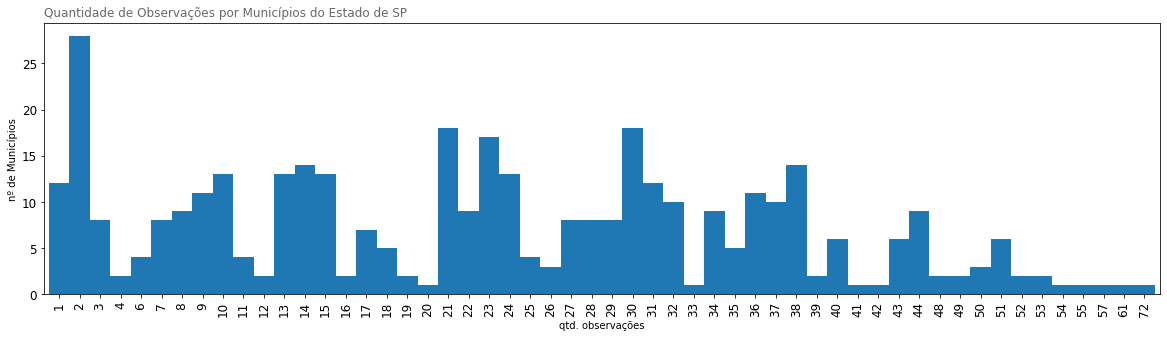

In [40]:
%matplotlib inline
ax = contagem_por_agrupamento_munuf.plot(y='munuf', kind='bar', figsize=(20,5),
                                         use_index=True, legend=False, fontsize=12, width=1.0)
ax.set_xlabel('qtd. observações')
ax.set_ylabel('nº de Municípios')
# Add titles
plt.title("Quantidade de Observações por Municípios do Estado de SP", loc='left', fontsize=12, fontweight=0, color='dimgrey')


#### 2.2.1.2 'lat'

Para latitude, não faz sentido calcular a frequência de observações pura e simples. Ao invés disso, será criada uma nova coluna para apontar a zona geográfica de acordo com a latitude (tropical, subtropical, temperada, polar). Mais a frente, nas análises multivariadas, latitude e longitude serão utilizadas para plotar no mapa de São Paulo os casos e as mortes confirmados de COVID-19.

In [41]:
def zona(x):
    if abs(x) <= 23.27:
        return 'Tropical'
    elif abs(x) <= 35:
        return 'Subtropical'
    elif abs(x) <= 66.33:
        return 'Temperada'
    else:
        return 'Polar'

In [42]:
dados['zona geográfica'] = [zona(x) for x in dados['lat']]
colunas = ['data', 'dias_epidemiológicos', 'mês', 'cod7d', 'cidade', 'munuf', 'casos_diários',
       'casos_acumulados', 'mortes_diárias', 'mortes_acumuladas', 'habitantes',
       'casos_por_100mil_hab', 'mortes_por_milhão_hab', 'lat', 'lon', 'zona geográfica',
       'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS',
       'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
       'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
       'Total_SUS', 'índice_isolamento']
dados = dados.reindex(columns=colunas)
dados.head()

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53


In [43]:
cidade = dados[['cod7d', 'munuf', 'zona geográfica']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['zona geográfica'].value_counts())

percent = pd.DataFrame(dados['zona geográfica'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['zona geográfica'].value_counts())

percent2 = pd.DataFrame(cidade['zona geográfica'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table

,qtd. observações,% observações,qtd. municípios,% municípios
Tropical,5707,64.889142,282,73.629243
Subtropical,3088,35.110858,101,26.370757


Quase 65% das observações estão na zona tropical, embora quase 3/4 dos municípios do dataset estejam nessa região, o que pode ser explicado pela epidemia de COVID-19 no Brasil ter se iniciado na região subtropical (SP) e portanto estar mais "madura" nessa região. Hipótese: com o tempo, a tendência é que a distribuição de observações nas zonas se aproxime mais da distribuição dos municípios nas zonas. Se isso não se comprovar, pode ser um indicativo de que o clima afeta o contágio do novo coronavírus.

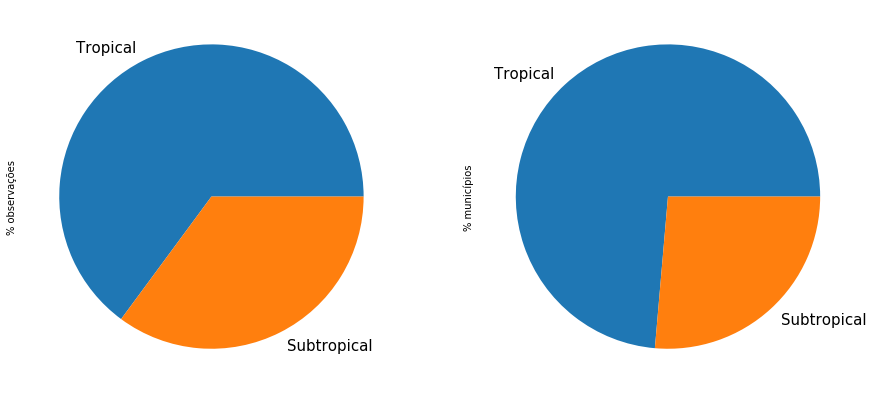

In [44]:
%matplotlib inline
ax = table[['% observações', '% municípios']].plot(subplots=True, kind='pie', figsize=(15,10),
                use_index=False, legend=False, fontsize=15)


#### 2.2.1.3 'lon'

Para longitude, não faz sentido calcular a frequência de observações pura e simples. Ao invés disso, será criada uma nova coluna para apontar em qual faixa de meridianos o município se encontra, contando de 10 em 10, para verificar a trajetória do vírus em direção ao interior do estado de São Paulo com o número de observações. Mais a frente, nas análises multivariadas, latitude e longitude serão utilizadas para plotar no mapa de São Paulo os casos e as mortes confirmados de COVID-19.

In [45]:
def meridiano(x):
    if abs(x) <= 30:
        return 'meridiano 20 a 30'
    elif abs(x) <= 40:
        return 'meridiano 30 a 40'
    elif abs(x) <= 50:
        return 'meridiano 40 a 50'
    elif abs(x) <= 60:
        return 'meridiano 50 a 60'
    elif abs(x) <= 70:
        return 'meridiano 60 a 70'
    else:
        return 'meridiano 70 a 80'

In [46]:
dados['faixa meridional'] = [meridiano(x) for x in dados['lon']]
colunas = ['data', 'dias_epidemiológicos', 'mês', 'cod7d', 'cidade', 'munuf', 'casos_diários',
       'casos_acumulados', 'mortes_diárias', 'mortes_acumuladas', 'habitantes',
       'casos_por_100mil_hab', 'mortes_por_milhão_hab', 'lat', 'lon', 'zona geográfica', 'faixa meridional',
       'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS',
       'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
       'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
       'Total_SUS', 'índice_isolamento']
dados = dados.reindex(columns=colunas)
dados.head()

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53


In [47]:
cidade = dados[['cod7d', 'munuf', 'faixa meridional']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['faixa meridional'].value_counts())

percent = pd.DataFrame(dados['faixa meridional'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['faixa meridional'].value_counts())

percent2 = pd.DataFrame(cidade['faixa meridional'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table.sort_index()

,qtd. observações,% observações,qtd. municípios,% municípios
meridiano 40 a 50,7843,89.175668,325,84.856397
meridiano 50 a 60,952,10.824332,58,15.143603


Ao contrário da análise por latitude, a análise por longitude não traz grande diferença na distribuição de observações por faixa longitudinal e a distribuição de municípios por faixa longitudinal. Mesmo assim, ainda nota-se ligeira vantagem no percentual de observações em relação ao percentual de municípios na faixa longitudinal de 40, o que parece fazer sentido, já que o contágio começou na faixa de 40 a 50 e seguiu para o interior.

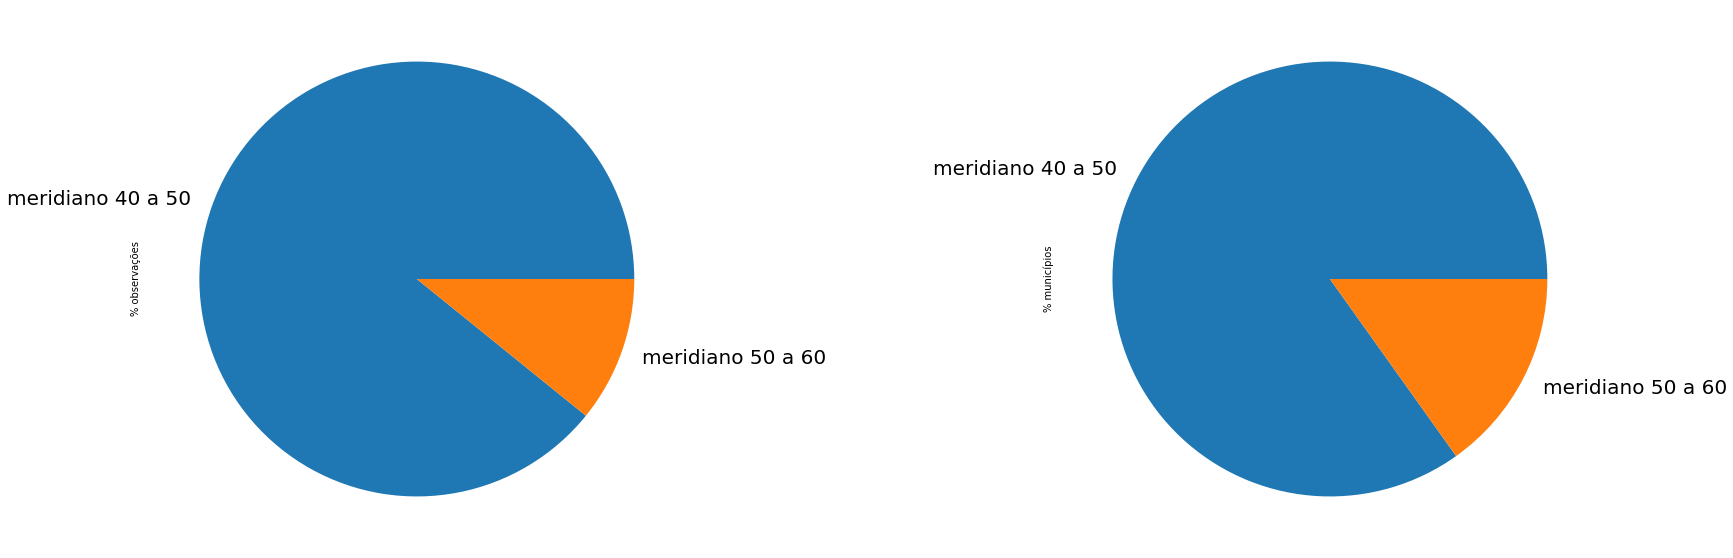

In [48]:
%matplotlib inline
ax = table[['% observações', '% municípios']].plot(subplots=True, kind='pie', figsize=(30,10),
                use_index=False, legend=False, fontsize=20)

#### 2.2.1.4. 'capital'

In [49]:
cidade = dados[['cod7d', 'munuf', 'capital']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['capital'].value_counts())

percent = pd.DataFrame(dados['capital'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['capital'].value_counts())

percent2 = pd.DataFrame(cidade['capital'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table

,qtd. observações,% observações,qtd. municípios,% municípios
N,8723,99.181353,382,99.738903
S,72,0.818647,1,0.261097


A maior concentração proporcional de observações na capital demonstra que até a data de corte, a COVID-19 tinha mais presença na capital do que no interior.

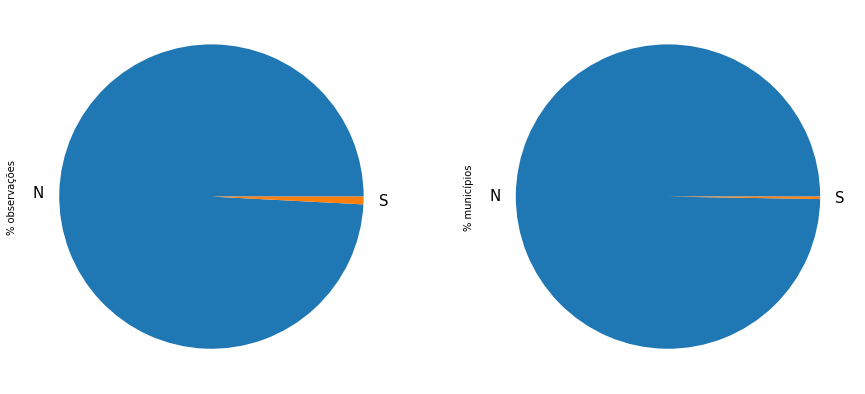

In [50]:
%matplotlib inline
ax = table[['% observações', '% municípios']].plot(subplots=True, kind='pie', figsize=(15,10),
                use_index=False, legend=False, fontsize=15)

#### 2.2.1.5. 'litoral'

In [51]:
cidade = dados[['cod7d', 'munuf', 'litoral']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['litoral'].value_counts())

percent = pd.DataFrame(dados['litoral'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['litoral'].value_counts())

percent2 = pd.DataFrame(cidade['litoral'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table

,qtd. observações,% observações,qtd. municípios,% municípios
N,8346,94.894827,368,96.083551
S,449,5.105173,15,3.916449


A maior concentração de observações no litoral, comparativamente ao percentual de municípios que estão na faixa litorânea,  pode ser um indicativo de que o coronavírus teve taxa de transmissão mais alta no litoral, devido a condições socioeconômicas. Vale investigar isso nas análises multivariáveis.

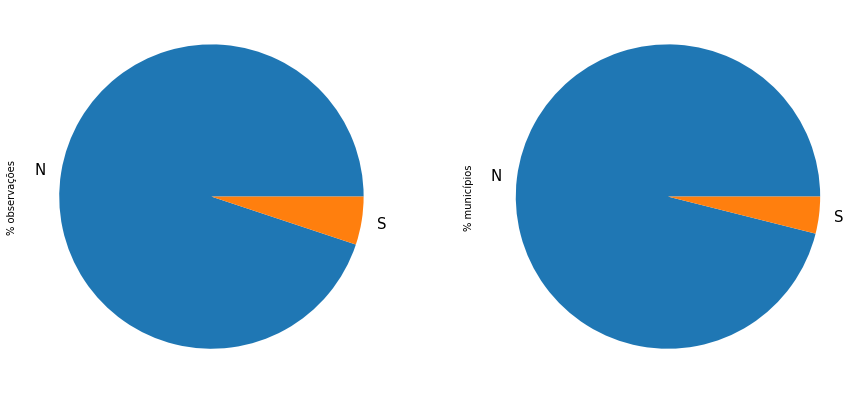

In [52]:
%matplotlib inline
ax = table[['% observações', '% municípios']].plot(subplots=True, kind='pie', figsize=(15,10),
                use_index=False, legend=False, fontsize=15)

#### 2.2.1.6. 'papel'

In [53]:
cidade = dados[['cod7d', 'munuf', 'papel']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['papel'].value_counts())

percent = pd.DataFrame(dados['papel'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['papel'].value_counts())

percent2 = pd.DataFrame(cidade['papel'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table

,qtd. observações,% observações,qtd. municípios,% municípios
Interior,6094,69.289369,303,79.112272
Metropolitana,2629,29.891984,79,20.626632
Capital,72,0.818647,1,0.261097


Aqui se vê mais claramente que a pandemia ainda não havia avançado suficientemente no interior, como se pode notar pela maior distribuição relativa de observações na capital e nas regiões metropolitanas.

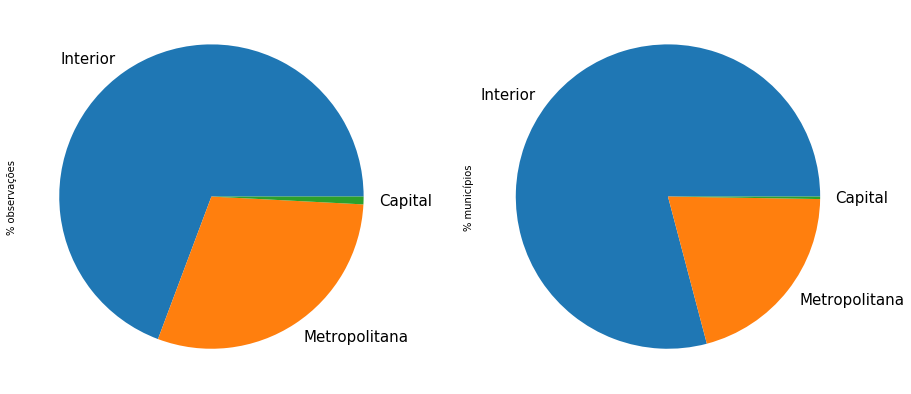

In [54]:
%matplotlib inline
ax = table[['% observações', '% municípios']].plot(subplots=True, kind='pie', figsize=(15,10),
                use_index=False, legend=False, fontsize=15)

#### 2.2.1.7. 'Mesorregião Geográfica', 'Nome_Mesorregião'

In [55]:
cidade = dados[['cod7d', 'munuf', 'Nome_Mesorregião']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['Nome_Mesorregião'].value_counts())

percent = pd.DataFrame(dados['Nome_Mesorregião'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['Nome_Mesorregião'].value_counts())

percent2 = pd.DataFrame(cidade['Nome_Mesorregião'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1, sort=False)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table

,qtd. observações,% observações,qtd. municípios,% municípios
Metropolitana de São Paulo,1815,20.636725,45,11.749347
Campinas,1046,11.893121,43,11.227154
Macro Metropolitana Paulista,886,10.073906,35,9.138381
Ribeirão Preto,796,9.050597,39,10.182768
Bauru,742,8.436612,38,9.921671
São José do Rio Preto,614,6.981239,35,9.138381
Vale do Paraíba Paulista,582,6.617396,25,6.527415
Piracicaba,395,4.491188,19,4.960836
Litoral Sul Paulista,361,4.104605,17,4.438642
Presidente Prudente,341,3.877203,22,5.744125


Na análise por mesorregião, se destaca negativamente a mesorregião Metropolitana de São Paulo, com o dobro de % de observações em relação ao % de municípios, demonstrando que foi a mesorregião do estado em que a pandemia mais se proliferou sem controle até a data de corte.

No outro espectro, destacam-se as mesorregiões de São José do Rio Preto, Presidente Prudente e Assis que, até a data de corte, demonstraram taxas de contágio menores entre municípios.


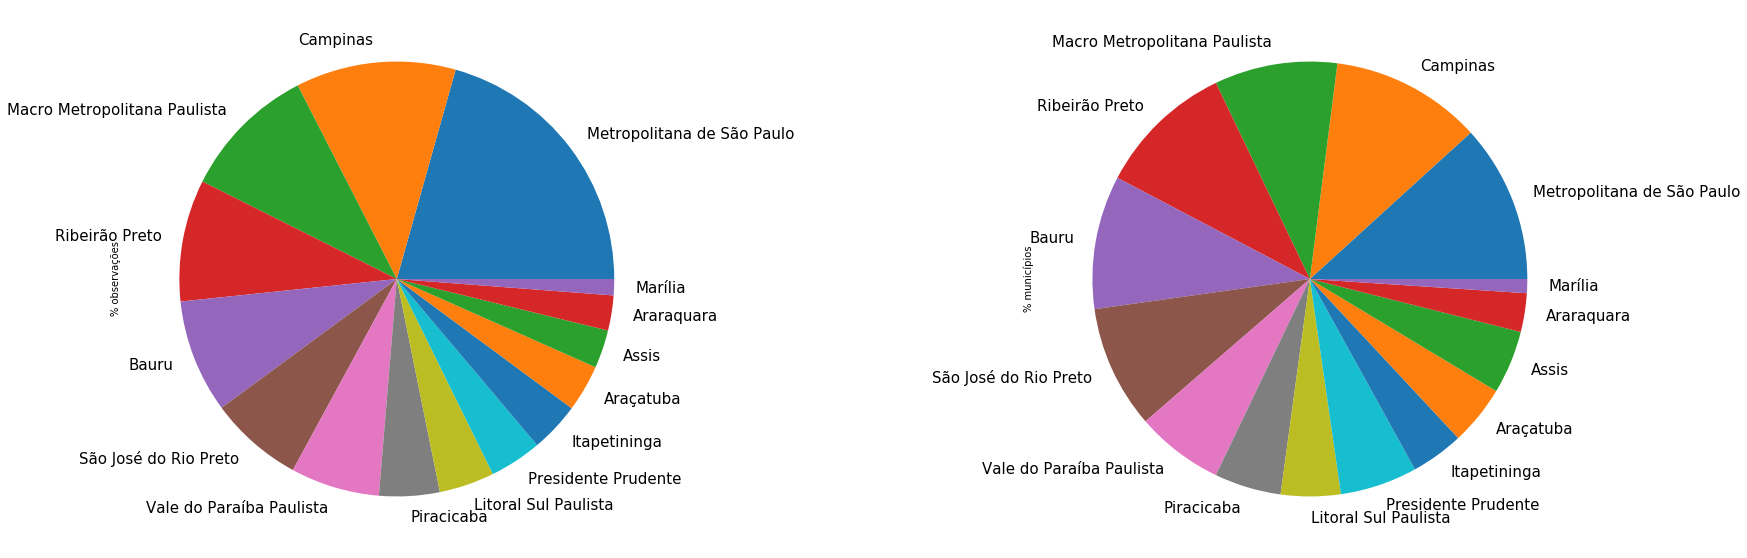

In [56]:
%matplotlib inline
ax = table[['% observações', '% municípios']].plot(subplots=True, kind='pie', figsize=(30,10),
                use_index=False, legend=False, fontsize=15)

#### 2.2.1.8. 'Microrregião Geográfica', 'Nome_Microrregião'

In [57]:
cidade = dados[['cod7d', 'munuf', 'Nome_Microrregião']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['Nome_Microrregião'].value_counts())

percent = pd.DataFrame(dados['Nome_Microrregião'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['Nome_Microrregião'].value_counts())

percent2 = pd.DataFrame(cidade['Nome_Microrregião'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1, sort=False)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table

,qtd. observações,% observações,qtd. municípios,% municípios
Campinas,515,5.855600,15,3.916449
São Paulo,399,4.536669,8,2.088773
Sorocaba,370,4.206936,14,3.655352
Osasco,350,3.979534,8,2.088773
São José do Rio Preto,314,3.570210,13,3.394256
...,...,...,...,...
Nhandeara,31,0.352473,5,1.305483
Novo Horizonte,24,0.272882,3,0.783290
Auriflama,19,0.216032,2,0.522193
Paraibuna/Paraitinga,14,0.159181,4,1.044386


Na análise por microrregião, se destacam negativamente as microrregiões de:
* Campinas, com quase 50% mais observações em relação ao percentual de municípios;
* São Paulo, com 117% mais observações em relação ao percentual de municípios;
* Osasco, com 90% mais observações em relação ao percentual de municípios.

Isso demonstra que a doença esteve mais presente e de forma menos controlada nessas microrregiões até a data de corte, lembrando que São Paulo e Osasco pertencem à mesorregião Metropolitana de São Paulo

Text(0.0, 1.0, '% de Observações e de Municípios por Microrregião do Estado de SP')

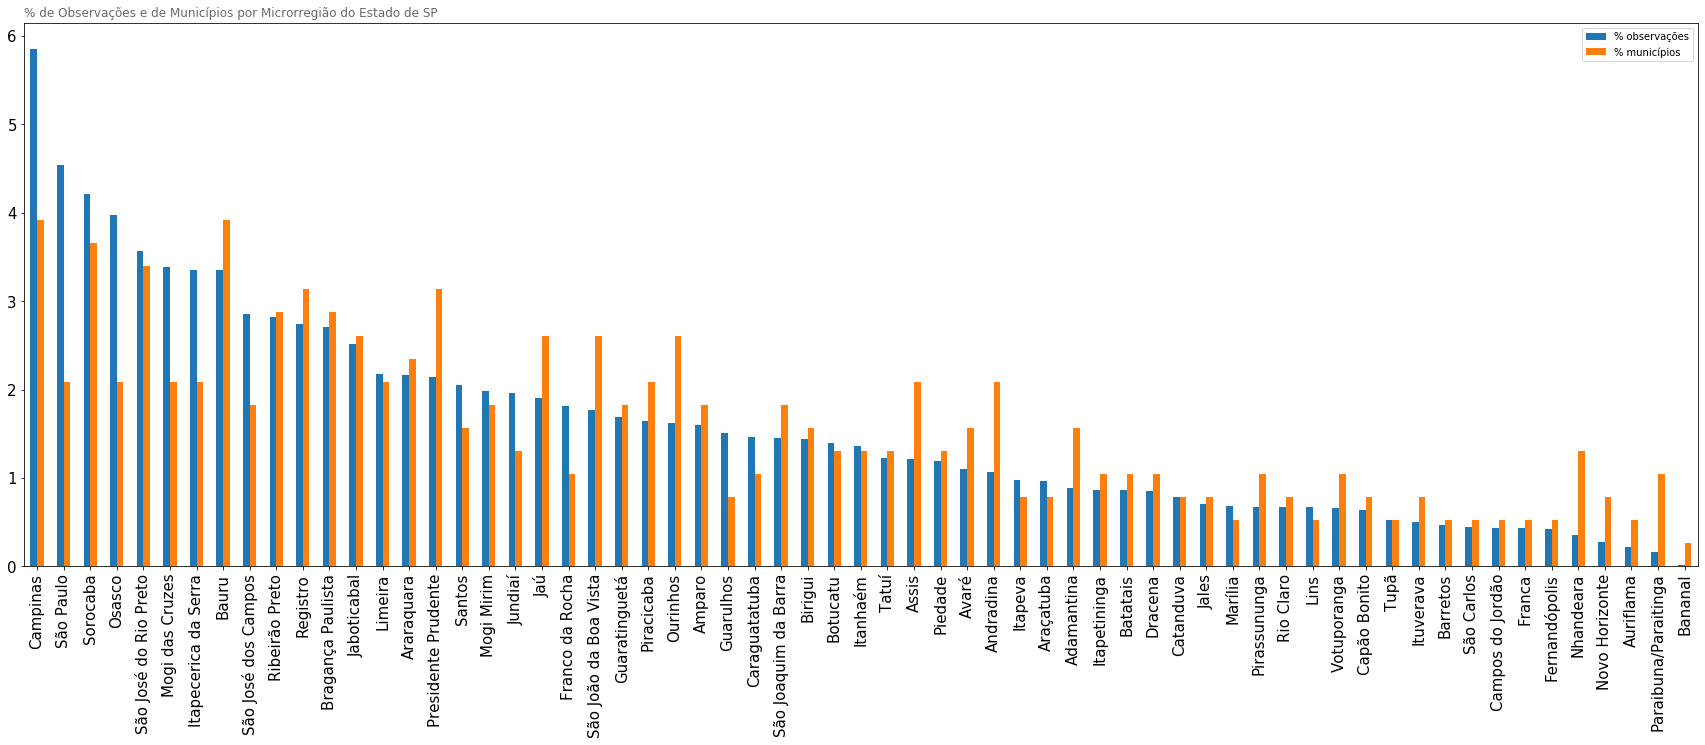

In [58]:
table[['% observações', '% municípios']].plot(kind='bar', figsize=(30,10),
                use_index=True, legend=True, fontsize=15)
# Add titles
plt.title("% de Observações e de Municípios por Microrregião do Estado de SP", loc='left', fontsize=12, fontweight=0, color='dimgrey')


#### 2.2.1.9. 'data'

In [59]:
count = pd.DataFrame(dados['data'].value_counts())

percent = pd.DataFrame(dados['data'].value_counts(normalize=True)*100)

table = pd.concat([count, percent], axis=1)

table.columns = ['qtd.', '%']
table.sort_index(inplace=True)
table

,qtd.,%
2020-02-26,1,0.011370
2020-02-27,1,0.011370
2020-02-28,1,0.011370
2020-02-29,1,0.011370
2020-03-01,1,0.011370
...,...,...
2020-05-03,333,3.786242
2020-05-04,335,3.808982
2020-05-05,344,3.911313
2020-05-06,371,4.218306


Text(0.0, 1.0, 'Quantidade de Observações do Estado de SP por data')

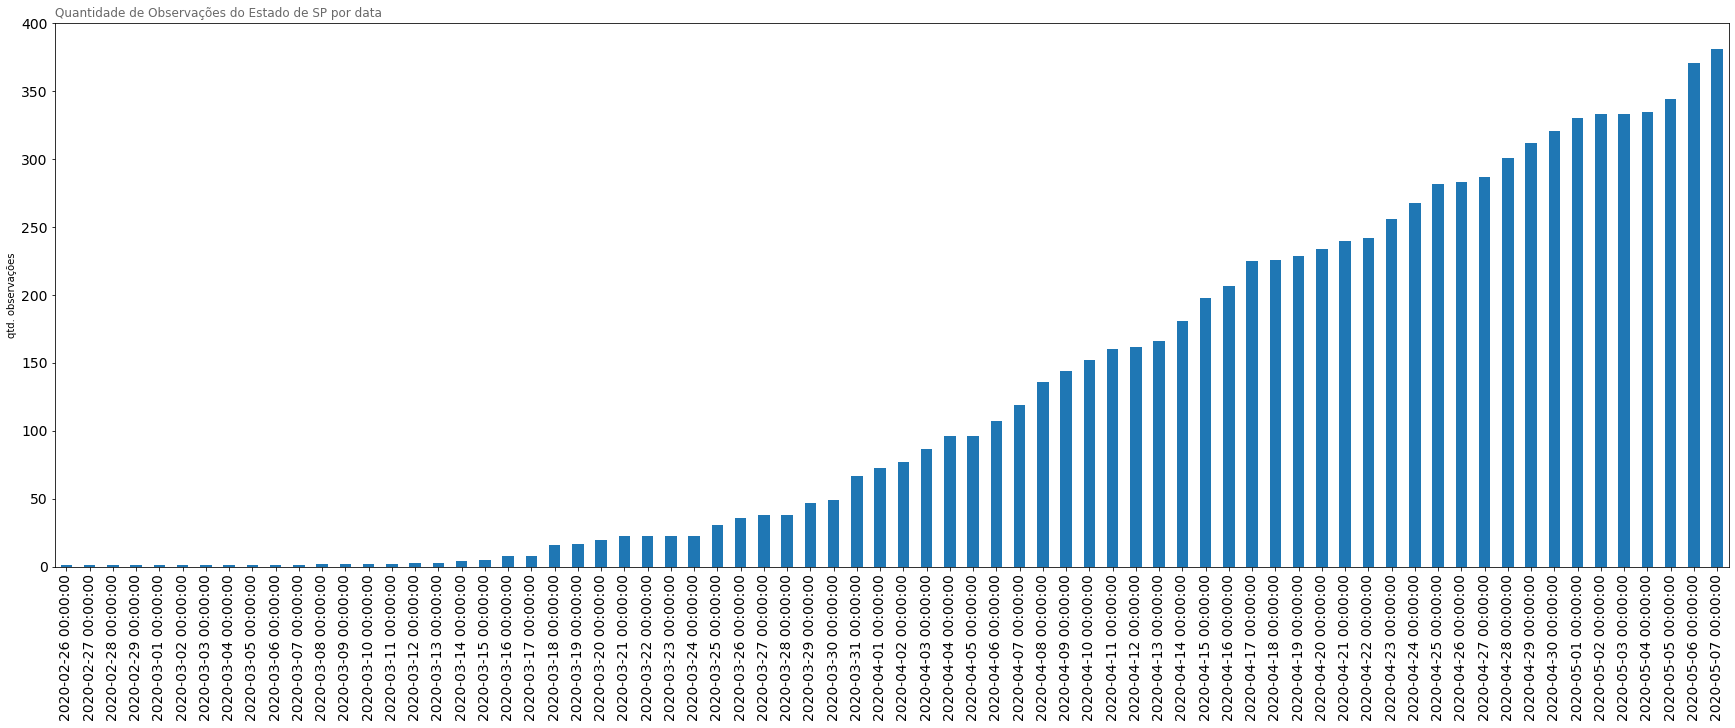

In [60]:
%matplotlib inline
ax = table.plot(y='qtd.', kind='bar', figsize=(30,10),
                use_index=True, legend=False, fontsize=14               
               )
ax.set_xlabel('')
ax.set_ylabel('qtd. observações')
# Add titles
plt.title("Quantidade de Observações do Estado de SP por data", loc='left', fontsize=12, fontweight=0, color='dimgrey')


Ao analisarmos a evolução da quantidade de observações por data, podemos ver claramente a curva ascendente de novos municípios sendo atingidos pela pandemia.

#### 2.2.1.10. 'dias_epidemiológicos'

In [61]:
count = pd.DataFrame(dados['dias_epidemiológicos'].value_counts())

percent = pd.DataFrame(dados['dias_epidemiológicos'].value_counts(normalize=True)*100)

table = pd.concat([count, percent], axis=1)

table.columns = ['qtd.', '%']
table.sort_index(inplace=True)
table

,qtd.,%
1,383,4.354747
2,368,4.184196
3,339,3.854463
4,333,3.786242
5,330,3.752132
...,...,...
68,1,0.011370
69,1,0.011370
70,1,0.011370
71,1,0.011370


Text(0.0, 1.0, 'Frequência da Quantidade de Dias Epidemiológicos das Observações no Estado de SP')

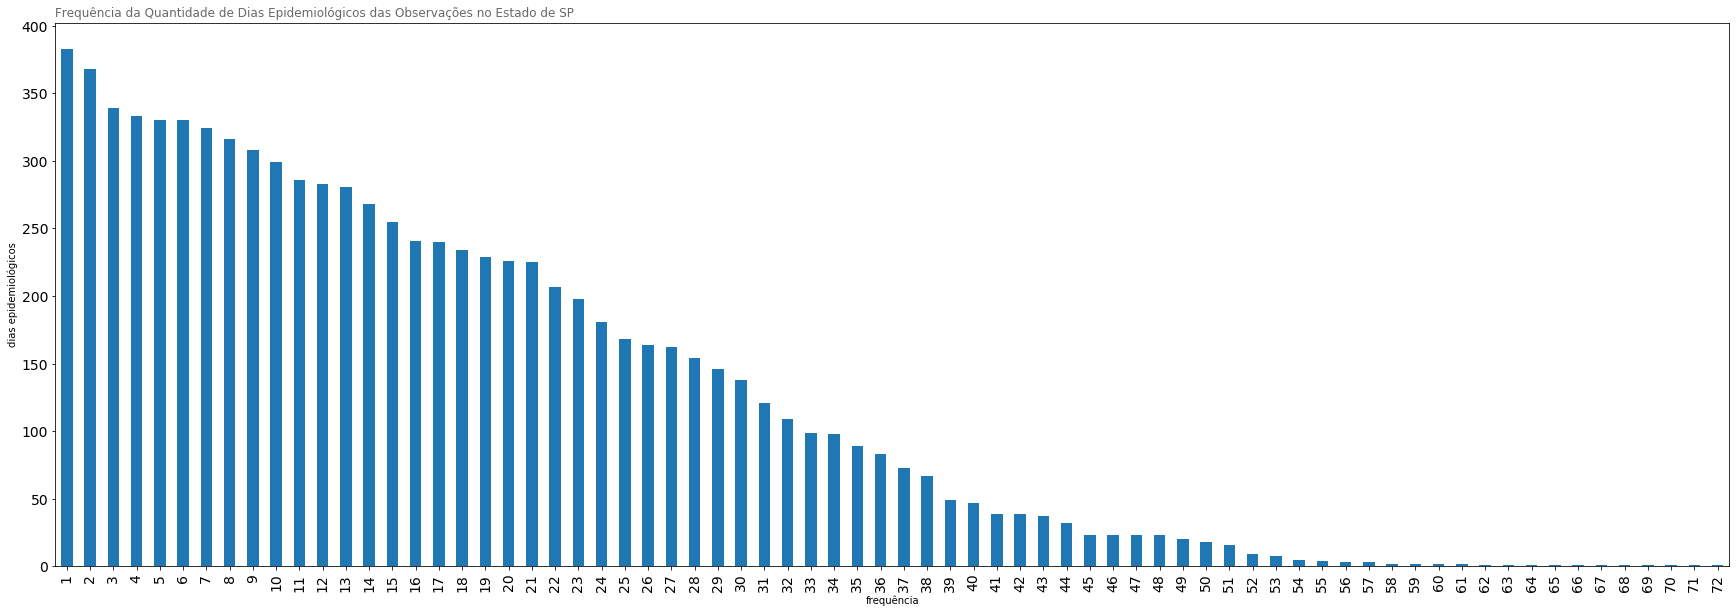

In [62]:
%matplotlib inline
ax = table.plot(y='qtd.', kind='bar', figsize=(30,10),
                use_index=True, legend=False, fontsize=14               
               )
ax.set_xlabel('frequência')
ax.set_ylabel('dias epidemiológicos')
# Add titles
plt.title("Frequência da Quantidade de Dias Epidemiológicos das Observações no Estado de SP", loc='left', fontsize=12, fontweight=0, color='dimgrey')


Ao analisarmos a frequência da quantidade de dias epidemiológicos, é natural vermos uma curva descendente conforme a quantidade de dias epidemiológicos aumenta, já que é da natureza da epidemia começar em uma cidade e, aos poucos, ir infectando outras.

#### 2.2.1.11. 'mês'

In [63]:
count = pd.DataFrame(dados['mês'].value_counts())

percent = pd.DataFrame(dados['mês'].value_counts(normalize=True)*100)

table = pd.concat([count, percent], axis=1)

table.columns = ['qtd.', '%']
table.sort_index(inplace=True)
table

,qtd.,%
2,4,0.045480
3,497,5.650938
4,5867,66.708357
5,2427,27.595225


Text(0.0, 1.0, 'Quantidade de Observações por Mês do Estado de SP')

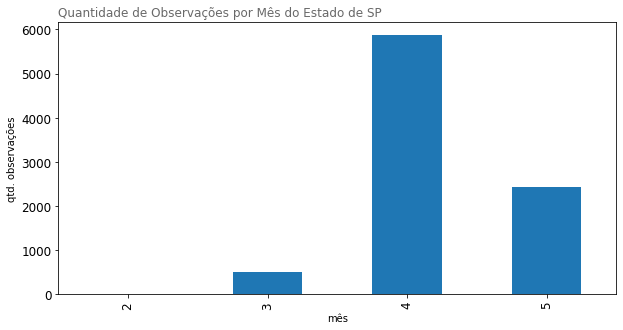

In [64]:
%matplotlib inline
ax = table.plot(y='qtd.', kind='bar', figsize=(10,5),
                use_index=True, legend=False, fontsize=12               
               )
ax.set_xlabel('mês')
ax.set_ylabel('qtd. observações')
# Add titles
plt.title("Quantidade de Observações por Mês do Estado de SP", loc='left', fontsize=12, fontweight=0, color='dimgrey')

Ao olhar o recorte do mês, é impressionante o salto de observações de março para abril, os únicos meses completos do dataset. E tão impressionante quanto é o mês de maio, que com apenas 7 dias já responde por 30% das observações.

#### 2.2.1.12. 'faixa_pop'

In [65]:
cidade = dados[['cod7d', 'munuf', 'faixa_pop']].copy()
cidade.drop_duplicates(subset='cod7d', keep='first', inplace=True)

count = pd.DataFrame(dados['faixa_pop'].value_counts())

percent = pd.DataFrame(dados['faixa_pop'].value_counts(normalize=True)*100)

count2 = pd.DataFrame(cidade['faixa_pop'].value_counts())

percent2 = pd.DataFrame(cidade['faixa_pop'].value_counts(normalize=True)*100)

table = pd.concat([count, percent, count2, percent2], axis=1, sort=False)

table.columns = ['qtd. observações', '% observações', 'qtd. municípios', '% municípios']
table

,qtd. observações,% observações,qtd. municípios,% municípios
Maior de 100 mil,3250,36.952814,81,21.148825
Maior de 10 mil,2975,33.826038,171,44.647520
Maior de 50 mil,1677,19.067652,57,14.882507
Menor de 10 mil,893,10.153496,74,19.321149


A maioria das observações (37%) está concentrada nos municípios com população maior de 100 mil habitantes (21% dos municípios) e 1/3 das observações está nas cidades entre 10 mil e 50 mil habitantes (que representam 45% dos municípios).

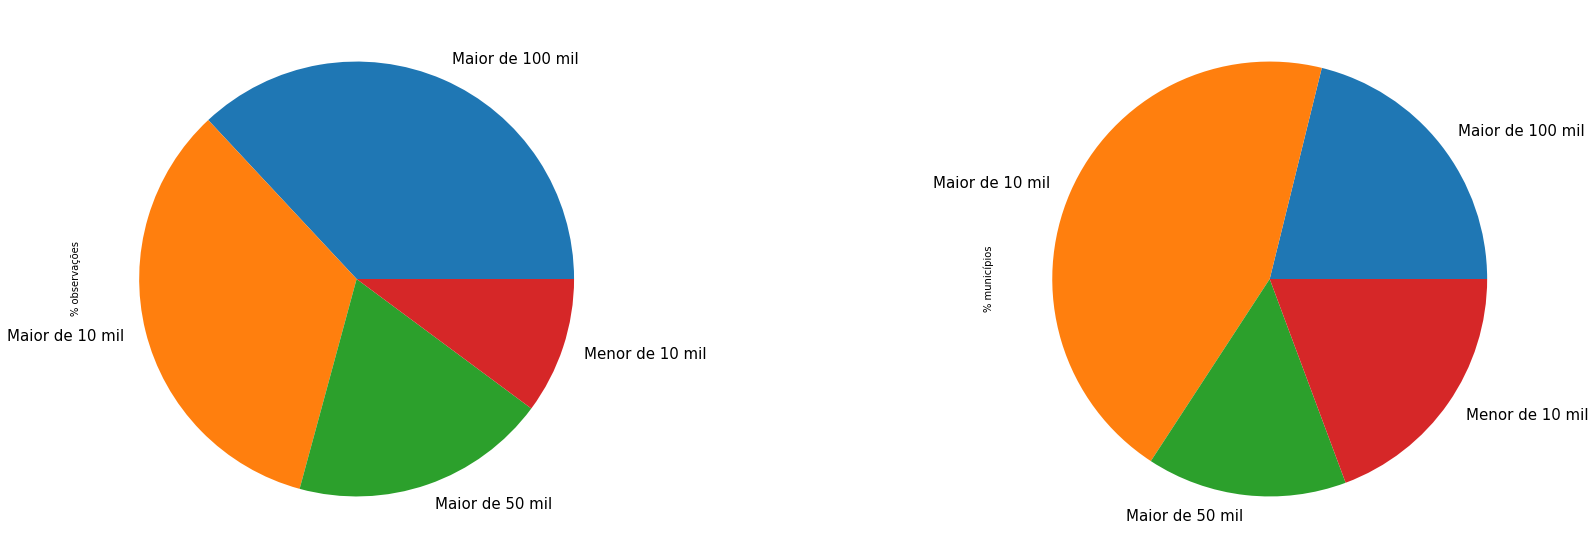

In [66]:
%matplotlib inline
ax = table[['% observações', '% municípios']].plot(subplots=True, kind='pie', figsize=(30,10),
                use_index=False, legend=False, fontsize=15)

# 3. Base para Modelagem

In [67]:
import os

In [68]:
dados.shape

(8795, 41)

In [69]:
dados.columns

Index(['data', 'dias_epidemiológicos', 'mês', 'cod7d', 'cidade', 'munuf',
       'casos_diários', 'casos_acumulados', 'mortes_diárias',
       'mortes_acumuladas', 'habitantes', 'casos_por_100mil_hab',
       'mortes_por_milhão_hab', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Total_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS',
       'Pediátrico_SUS', 'Outras_Especialidades_SUS', 'Hospital/DIA_SUS',
       'Total_SUS', 'índice_isolamento'],
      dtype='object')

In [70]:
path=r'D:\BIG DATA T14\TCC\Bases de Dados\Bases Finais'
dados.to_csv(os.path.join(path,r'dados_SP_modelo.csv'))